# Cancer type classification based on RNA-Seq data

Cancer is at its core a genetic disease. It is caused by mutations in protooncogenes (becoming then oncogenes and promoting cancer emergence) and in tumor suppressor genes (which normally suppress this emergence), and whose accumulation manifest as one or several hallmarks scientists have identified over the years. Currently, the consensus is that there exist eight of such hallmarks, which include such matters as resisting cell death, metastasis, enabling of replicative immortality and reprogramming of cell metabolism. [1]  
Cancer types can therefore be profiled via several characteristics, including the genetic mutations themselves, but also their effects in RNA and protein expression profiles, and even cellular and tumoral morphology. 
Here we focus on cancer type identification based on gene expression profiles obtained via RNA-sequencing (RNA-seq). The dataset (collected as part of the Pan-Cancer Atlas initiative, [2] and available at https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#), contains RNA-seq data of 20,531 genes, for 801 tumors grouped into five categories. These categories are prostate adenocarcinoma (PRAD), lung adenocarcinoma (LUAD), breast invasive carcinoma (BRCA), kidney renal clear cell carcinoma (KIRC), and colon adenocarcinoma (COAD).  
A "dummy" name is given to each gene (i.e. gene_1, gene_2, etc.). The "real" gene names are availible at Synapse (https://www.synapse.org) under the ID syn300013.   
The development of machine learning models aimed at cancer diagnostics emerges as a promising prospect, [3] specially when one considers the rise of liquid biopsies couple with RNA-seq. [4]

[1] Hanahan, D. Hallmarks of cancer: New dimensions. Cancer Discovery 12, 31–46 (2022).  
[2] Weinstein, J. N. et al. The cancer genome Atlas Pan-Cancer Analysis Project. Nature Genetics 45, 1113–1120 (2013).  
[3] Liu, L. et al. Machine learning protocols in early cancer detection based on liquid biopsy: A survey. Life 11, 638 (2021).  
[4] Martinez-Dominguez, M. V. et al. Current technologies for RNA-directed Liquid Diagnostics. Cancers 13, 5060 (2021).  

# About the code

All the functions we have developed are included in the "utils/ML1functions.jl" file. Each of these functions is responsible for executing a specific task. Moreover some functions have the same name but accept different inputs. This flexibility allows to obtain the same results while supplying a convenient input given the occasion, or even alternative ones. For example, trainClassANN, the name used for several functions in charge of training Artificial Neural Networks, in one of its iterations accepts only a train set, while in other is capable of accepting test and validation datasets along the train one. 
This functions are also build into each other. For example, the "main" confusionMatrix function (which evidently serves the purpose of constructing a confusion matrix) which accepts only the outputs of a model and its true targets, has a second version which accepts a threshold as well. This second function replaces the values of the outputs by 1 only if they are above the threshold and by 0 otherwise, then it calls the main confusionMatrix for the actual construction of the matrix.

# About the metrics

Throughout we decided to use accuracy as a metric. This is a good choice as the dataset is not overly imbalanced as we will see. When pertinent however, we will take a look at confusion matrices to better understand model performance. 

# Code import

In [1]:
include("utils/ML1functions.jl")

multiclassToBinarySeveralCats (generic function with 1 method)

# Random seed setup

To ensure reproducibility.

In [2]:
Random.seed!(1380649)

TaskLocalRNG()

# Approach 1. Naïve multiclass classification using few features

In [3]:
dataset = readdlm("dataset/data.csv",',')
labels = readdlm("dataset/labels.csv",',')

display(dataset)
display(labels)

802×20532 Matrix{Any}:
 ""             "gene_0"   "gene_1"  …   "gene_20529"   "gene_20530"
 "sample_0"    0.0        2.01721       5.28676        0.0
 "sample_1"    0.0        0.592732      2.09417        0.0
 "sample_2"    0.0        3.51176       1.68302        0.0
 "sample_3"    0.0        3.66362       3.292          0.0
 "sample_4"    0.0        2.65574    …  5.11037        0.0
 "sample_5"    0.0        3.46785       5.35513        0.0
 "sample_6"    0.0        1.22497       8.33091        0.0
 "sample_7"    0.0        2.85485       6.55149        0.0
 "sample_8"    0.0        3.99212       7.82832        0.0
 "sample_9"    0.0        3.64249    …  4.75915        0.0
 "sample_10"   0.0        3.49207       5.73512        0.892818
 "sample_11"   0.0        2.94118       5.27656        0.425782
 ⋮                                   ⋱  ⋮              
 "sample_789"  0.0        1.68706    …  3.43029        5.25413
 "sample_790"  0.0        2.30173       4.44266        0.0
 "sample_791

802×2 Matrix{Any}:
 ""            "Class"
 "sample_0"    "PRAD"
 "sample_1"    "LUAD"
 "sample_2"    "PRAD"
 "sample_3"    "PRAD"
 "sample_4"    "BRCA"
 "sample_5"    "PRAD"
 "sample_6"    "KIRC"
 "sample_7"    "PRAD"
 "sample_8"    "BRCA"
 "sample_9"    "PRAD"
 "sample_10"   "BRCA"
 "sample_11"   "KIRC"
 ⋮             
 "sample_789"  "KIRC"
 "sample_790"  "BRCA"
 "sample_791"  "BRCA"
 "sample_792"  "BRCA"
 "sample_793"  "BRCA"
 "sample_794"  "PRAD"
 "sample_795"  "LUAD"
 "sample_796"  "BRCA"
 "sample_797"  "LUAD"
 "sample_798"  "COAD"
 "sample_799"  "PRAD"
 "sample_800"  "PRAD"

Extraction of detailed cancer type labels and gene expression data.

In [4]:
inputs = Float32.(dataset[2:end,2:end])
targets = labels[2:end,2]

display(inputs)
display(targets)

801×20531 Matrix{Float32}:
 0.0       2.01721   3.26553   5.47849  …   8.92133  5.28676  0.0
 0.0       0.592732  1.58842   7.58616      9.39785  2.09417  0.0
 0.0       3.51176   4.3272    6.88179     10.0905   1.68302  0.0
 0.0       3.66362   4.50765   6.65907      9.68436  3.292    0.0
 0.0       2.65574   2.82155   6.53945      9.46119  5.11037  0.0
 0.0       3.46785   3.58192   6.62024  …   9.83647  5.35513  0.0
 0.0       1.22497   1.69118   6.57201      9.24422  8.33091  0.0
 0.0       2.85485   1.75048   7.22672      9.21687  6.55149  0.0
 0.0       3.99212   2.77273   6.54669     10.3903   7.82832  0.0
 0.0       3.64249   4.42356   6.84951      9.4843   4.75915  0.0
 0.0       3.49207   3.55337   7.15171  …   8.99177  5.73512  0.892818
 0.0       2.94118   2.66328   6.56169      9.30056  5.27656  0.425782
 0.0       3.97035   2.36429   7.14544      9.78621  6.02931  0.0
 ⋮                                      ⋱                     ⋮
 0.0       1.68706   2.82638   5.83016   

801-element Vector{Any}:
 "PRAD"
 "LUAD"
 "PRAD"
 "PRAD"
 "BRCA"
 "PRAD"
 "KIRC"
 "PRAD"
 "BRCA"
 "PRAD"
 "BRCA"
 "KIRC"
 "PRAD"
 ⋮
 "KIRC"
 "BRCA"
 "BRCA"
 "BRCA"
 "BRCA"
 "PRAD"
 "LUAD"
 "BRCA"
 "LUAD"
 "COAD"
 "PRAD"
 "PRAD"

Identifying unique cancer type labels.

In [5]:
display(unique(targets))

5-element Vector{Any}:
 "PRAD"
 "LUAD"
 "BRCA"
 "KIRC"
 "COAD"

Obtaining number of occurrences and what percentage of the data each type represents.

In [6]:
encodedTargets = oneHotEncoding(targets)

total = []
for i in 1:size(encodedTargets)[2]
    append!(total,count(i->(i == 1), encodedTargets[:,i]))
end    

percentages = (total/sum(total))*100
    
display(total)
display(percentages)

5-element Vector{Any}:
 136
 141
 300
 146
  78

5-element Vector{Float64}:
 16.978776529338326
 17.60299625468165
 37.453183520599254
 18.22721598002497
  9.737827715355806

The data is not too unbalanced. But the dataset contains the expression levels for too many genes, which would slow down training significantly. Moreover many of them are of null or negligible relevance for making accurate predictions, as we will see next.

First, it would be a good idea to normalize the raw data. The following scatter plot shows the expresion levels of three genes for every sample in the dataset.

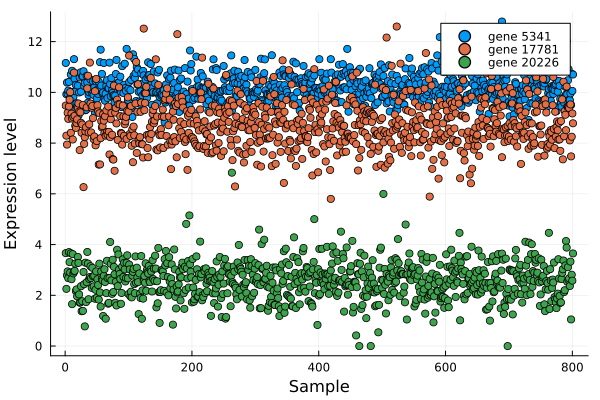

In [7]:
plt = Plots.plot() 
plot!(inputs[:,5342], seriestype=:scatter, label="gene 5341", xaxis = "Sample", yaxis = "Expression level")
plot!(inputs[:,17782], seriestype=:scatter, label="gene 17781")
plot!(inputs[:,20227], seriestype=:scatter, label="gene 20226")

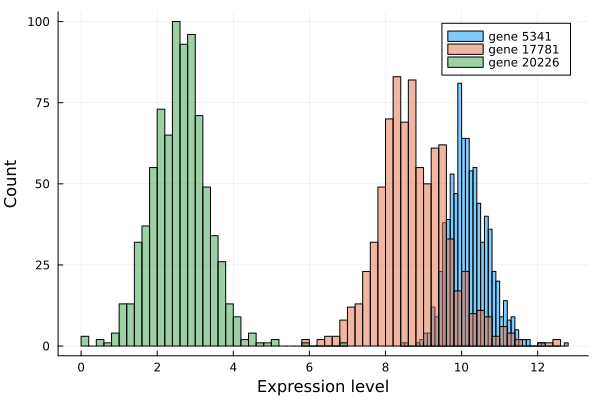

In [8]:
histogram([inputs[:,5342],inputs[:,17782],inputs[:,20227]],
    label = ["gene 5341" "gene 17781" "gene 20226"],
    xaxis="Expression level",yaxis = "Count",fillalpha=0.5,nbins=40)

As the data seems to be normally, rather than uniformly distributed, we will zero-mean normalize it.

In [9]:
inputsNormZM = normalizeZeroMean(inputs)

801×20531 Matrix{Float32}:
 -0.194678  -0.827513    0.159701  …  -1.1872    -0.116409   -0.261738
 -0.194678  -2.01376    -1.41416      -0.342065  -1.65585    -0.261738
 -0.194678   0.417087    1.15601       0.886305  -1.85411    -0.261738
 -0.194678   0.543549    1.32535       0.166068  -1.07827    -0.261738
 -0.194678  -0.29577    -0.256947     -0.229734  -0.201462   -0.261738
 -0.194678   0.380524    0.456613  …   0.435837  -0.0834402  -0.261738
 -0.194678  -1.48726    -1.31773      -0.61454    1.35146    -0.261738
 -0.194678  -0.129957   -1.26208      -0.66304    0.493435   -0.261738
 -0.194678   0.817116   -0.302758      1.41798    1.10911    -0.261738
 -0.194678   0.525958    1.24644      -0.188751  -0.370819   -0.261738
 -0.194678   0.400692    0.429826  …  -1.06227    0.0997876   2.1875
 -0.194678  -0.0580665  -0.405474     -0.514616  -0.121326    0.906294
 -0.194678   0.798981   -0.686052      0.346687   0.241645   -0.261738
  ⋮                                ⋱                

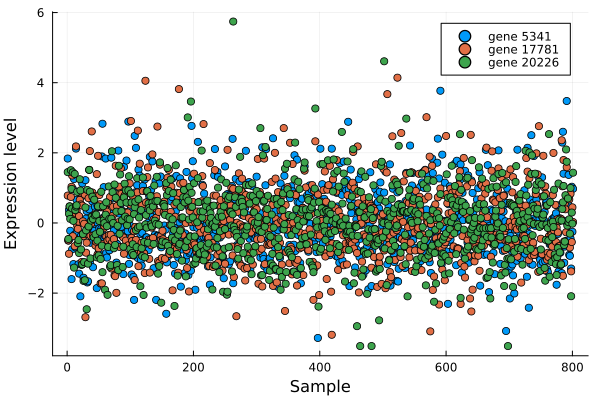

In [10]:
plt = Plots.plot() 
plot!(inputsNormZM[:,5342], seriestype=:scatter, label="gene 5341", xaxis = "Sample", yaxis = "Expression level")
plot!(inputsNormZM[:,17782], seriestype=:scatter, label="gene 17781")
plot!(inputsNormZM[:,20227], seriestype=:scatter, label="gene 20226")

As mentioned earlier, training models locally using the expression data for every gene would be quite burdensome for a laptop. It is therefore a good idea to use the expression data for some genes only. For the first couple of approaches we will naïvely select the first genes on the dataset to train the models. In particular, for this approach we will select the first 10 genes (gene 0 through gene 9).  
With this few genes, training should be quite fast.

In [11]:
naiveInputsNorm = inputsNormZM[:,1:10]

801×10 Matrix{Float32}:
 -0.194678  -0.827513    0.159701  …   0.180797    -0.125297  -0.0655919
 -0.194678  -2.01376    -1.41416      -0.982474    -0.125297  -0.0655919
 -0.194678   0.417087    1.15601      -0.0929367   -0.125297  -0.0655919
 -0.194678   0.543549    1.32535      -0.127751    -0.125297  -0.0655919
 -0.194678  -0.29577    -0.256947     -0.272995    -0.125297  -0.0655919
 -0.194678   0.380524    0.456613  …  -0.982474    -0.125297  -0.0655919
 -0.194678  -1.48726    -1.31773       0.0628667   -0.125297  -0.0655919
 -0.194678  -0.129957   -1.26208      -0.982474    -0.125297  -0.0655919
 -0.194678   0.817116   -0.302758     -0.290046    -0.125297  19.8033
 -0.194678   0.525958    1.24644       0.440906    -0.125297  -0.0655919
 -0.194678   0.400692    0.429826  …  -0.982474    -0.125297  -0.0655919
 -0.194678  -0.0580665  -0.405474      0.49968     -0.125297  -0.0655919
 -0.194678   0.798981   -0.686052     -0.982474    -0.125297  -0.0655919
  ⋮                           

For latter approaches we will come back to data preprocessing and select the genes most relevant for classification purposes. First though, we will create the test/train tuple relevant to approaches 1 and 2.

In [12]:
testTrainTuple = (naiveInputsNorm,targets)

(Float32[-0.19467768 -0.82751274 … -0.12529722 -0.06559193; -0.19467768 -2.013759 … -0.12529722 -0.06559193; … ; -0.19467768 -0.3502342 … -0.12529722 -0.06559193; -0.19467768 -0.5709953 … -0.12529722 -0.06559193], Any["PRAD", "LUAD", "PRAD", "PRAD", "BRCA", "PRAD", "KIRC", "PRAD", "BRCA", "PRAD"  …  "BRCA", "BRCA", "BRCA", "PRAD", "LUAD", "BRCA", "LUAD", "COAD", "PRAD", "PRAD"])

Now that we finished preprocessing the data, we will create a list whose purpose will be to assign one of k indices to every element in the set for crossvalidation purposes.

In [13]:
k = 10
kFoldIndices = crossvalidation(testTrainTuple[2],k)
kFoldIndices = Int64.(kFoldIndices)

801-element Vector{Int64}:
  3
  3
  4
  6
  2
  4
 10
  6
  9
  2
  4
  3
  2
  ⋮
  9
  7
  9
  9
  7
  4
  6
  1
 10
  3
  6
  1

Next we perform crossvalidation on different types of models, and using a variety of hyperparameters. In particular we train artificial neural networks (ANNs), decision tree classifiers (DTs), k-nearest neighbors classifiers (kNNs), and support vector machines (SVCs).

In [14]:
modelType = :ANN

modelHyperparameters1 = Dict("topology" => [size(testTrainTuple[1])[2],10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters2 = Dict("topology" => [size(testTrainTuple[1])[2],50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters3 = Dict("topology" => [size(testTrainTuple[1])[2],100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters4 = Dict("topology" => [size(testTrainTuple[1])[2],300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters5 = Dict("topology" => [size(testTrainTuple[1])[2],10,10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters6 = Dict("topology" => [size(testTrainTuple[1])[2],50,50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters7 = Dict("topology" => [size(testTrainTuple[1])[2],100,100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters8 = Dict("topology" => [size(testTrainTuple[1])[2],300,300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)

cvAnn1_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn1_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn1_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn1_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn1_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn1_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn1_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn1_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.6015308528747197, 0.07190123123248722, 0.5139971155202193, 0.06659921721573192)

In [15]:
modelType = :DecisionTree

modelHyperparameters1 = Dict("maxDepth" => 2,"randomState" => 0)
modelHyperparameters2 = Dict("maxDepth" => 3,"randomState" => 0)
modelHyperparameters3 = Dict("maxDepth" => 4,"randomState" => 0)
modelHyperparameters4 = Dict("maxDepth" => 5,"randomState" => 0)
modelHyperparameters5 = Dict("maxDepth" => 6,"randomState" => 0)
modelHyperparameters6 = Dict("maxDepth" => 10,"randomState" => 0)

cvDt1_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt1_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt1_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt1_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt1_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt1_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.857117315523283, 0.01583777642370872, 0.4830867539985581, 0.048641612361773334)

In [16]:
modelType = :kNN

modelHyperparameters1 = Dict("nNeighbors" => 2)
modelHyperparameters2 = Dict("nNeighbors" => 3)
modelHyperparameters3 = Dict("nNeighbors" => 4)
modelHyperparameters4 = Dict("nNeighbors" => 5)
modelHyperparameters5 = Dict("nNeighbors" => 6)
modelHyperparameters6 = Dict("nNeighbors" => 7)

cvKnn1_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn1_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn1_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn1_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn1_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn1_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.6170107292190821, 0.008195254936761171, 0.5095578958602525, 0.06282313760166958)

In [17]:
modelType = :SVC

modelHyperparameters1 = Dict("C" => 0.0001)
modelHyperparameters2 = Dict("C" => 0.001)
modelHyperparameters3 = Dict("C" => 0.01)
modelHyperparameters4 = Dict("C" => 0.1)
modelHyperparameters5 = Dict("C" => 1)
modelHyperparameters6 = Dict("C" => 10)
modelHyperparameters7 = Dict("C" => 100)
modelHyperparameters8 = Dict("C" => 1000)

cvSvc1_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc1_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc1_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc1_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc1_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc1_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc1_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc1_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.6170107292190821, 0.008195254936761171, 0.5095578958602525, 0.06282313760166958)

In [18]:
AccAnns1 = [cvAnn1_1[3],cvAnn1_2[3],cvAnn1_3[3],cvAnn1_4[3],cvAnn1_5[3],cvAnn1_6[3],cvAnn1_7[3],cvAnn1_8[3]]
AccDts1 = [cvDt1_1[3],cvDt1_2[3],cvDt1_3[3],cvDt1_4[3],cvDt1_5[3],cvDt1_6[3]]
AccKnns1 = [cvKnn1_1[3],cvKnn1_2[3],cvKnn1_3[3],cvKnn1_4[3],cvKnn1_5[3],cvKnn1_6[3]]
AccSvc1 = [cvSvc1_1[3],cvSvc1_2[3],cvSvc1_3[3],cvSvc1_4[3],cvSvc1_5[3],cvSvc1_6[3],cvSvc1_7[3],cvSvc1_8[3]]

StdAnns1 = [cvAnn1_1[4],cvAnn1_2[4],cvAnn1_3[4],cvAnn1_4[4],cvAnn1_5[4],cvAnn1_6[4],cvAnn1_7[4],cvAnn1_8[4]]
StdDts1 = [cvDt1_1[4],cvDt1_2[4],cvDt1_3[4],cvDt1_4[4],cvDt1_5[4],cvDt1_6[4]]
StdKnns1 = [cvKnn1_1[4],cvKnn1_2[4],cvKnn1_3[4],cvKnn1_4[4],cvKnn1_5[4],cvKnn1_6[4]]
StdSvc1 = [cvSvc1_1[4],cvSvc1_2[4],cvSvc1_3[4],cvSvc1_4[4],cvSvc1_5[4],cvSvc1_6[4],cvSvc1_7[4],cvSvc1_8[4]]

8-element Vector{Float64}:
 0.06282313760166958
 0.06282313760166958
 0.06282313760166958
 0.06282313760166958
 0.06282313760166958
 0.06282313760166958
 0.06282313760166958
 0.06282313760166958

Once all the models have been trained, we can take a look at their performance in terms of accuracy and standard deviation. 

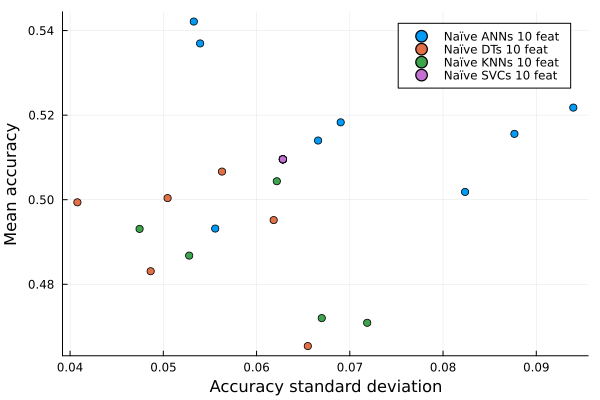

In [19]:
plt = Plots.plot() 
plot!(StdAnns1, AccAnns1, seriestype=:scatter, label="Naïve ANNs 10 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy")
plot!(StdDts1, AccDts1, seriestype=:scatter, label="Naïve DTs 10 feat")
plot!(StdKnns1, AccKnns1, seriestype=:scatter, label="Naïve KNNs 10 feat")
plot!(StdSvc1, AccSvc1, seriestype=:scatter, label="Naïve SVCs 10 feat")

As evidenced by the plot, all classifiers did very poorly, with accuracies close to 50%. One interesting thing to notice is that we obtained the same classification accuracies regardless of the "C" hyperparameter values while training SVCs. 

We can do better however, by combining several "weak" classifiers in an ensemble to make predictions. Next we combine a SVM, a kNN, and a DT to make predictions using a majority voting scheme.

In [20]:
estimators = [:SVC,:kNN,:DecisionTree]
modelsHyperParameters =  [Dict{String,Any}("C" => 10), Dict{String,Any}("nNeighbors" => 4), 
                            Dict{String,Any}("maxDepth" => 2,"randomState" => 0)]

ensemble1 = trainClassEnsemble(estimators,modelsHyperParameters,
                            (testTrainTuple[1],oneHotEncoding(testTrainTuple[2])),kFoldIndices)

0.8229034672690119

We can see the accuracy of the ensemble trumps over that of individual weak classifiers.

Now we take a look at both the best and worst performers accuracy-wise.

In [21]:
display(argmin(AccDts1))
display(argmax(AccAnns1))

1

3

We can see the best performer was ANN1_3, and the worst DT1_1. To better analyze this model we will train them both starting with the decision tree.

In [22]:
testTrainTuplesIndices = holdOut(size(testTrainTuple[1])[1],0.1)

testInputs = []
testTargets = []
for i in testTrainTuplesIndices[1]
    push!(testInputs,testTrainTuple[1][i,:])
    push!(testTargets,testTrainTuple[2][i])
end

trainInputs = []
trainTargets = []
for i in 1:length(testTrainTuplesIndices[2])
    push!(trainInputs,testTrainTuple[1][i,:])
    push!(trainTargets,testTrainTuple[2][i])
end

model = DecisionTreeClassifier(max_depth=2)
fit!(model,trainInputs,trainTargets)
testOutputs = predict(model,testInputs)
confMatrixDt1_5 = confusionMatrix(testOutputs,testTargets)[end]

5×5 Matrix{Int64}:
 21  3  1  6  16
 10  5  1  8   0
  0  0  8  1   0
  0  0  0  0   0
  0  0  0  0   0

From the confusion matrix we can see the model was unable to predict the KIRK and COAD classes, and missclassified many samples as PRAD and LUAD.

In [23]:
valTestTrainTuples = partition((testTrainTuple[1],oneHotEncoding(testTrainTuple[2])),Ptest=0.1,Pval=0.1)

valTuple = valTestTrainTuples[1]
testTuple = valTestTrainTuples[2]
trainTuple = valTestTrainTuples[3] 

topology = [size(trainTuple[1])[2],100,size(trainTuple[2])[2]]

ann1_2 = trainClassANN(topology,trainTuple,maxEpochs=500,learningRate=3e-3,
    validationDataset=valTuple,testDataset=testTuple,minLoss=0.1,showText=true)

Epoch: 0 , training loss: 1.581834, validation loss: 1.6641538
test loss: 1.5360415
Epoch: 100 , training loss: 1.3649937, validation loss: 1.4279861
test loss: 1.3956519
Epoch: 200 , training loss: 1.1902982, validation loss: 1.2832059
test loss: 1.2280637
Epoch: 300 , training loss: 1.0796318, validation loss: 1.1897465
test loss: 1.1677749
Epoch: 400 , training loss: 1.0090919, validation loss: 1.1260717
test loss: 1.1114408
Epoch: 427 , training loss: 0.99522364, validation loss: 1.1298848
test loss: 1.1089995
Validation loss did not improve in the last 20 epochs


(Chain(Dense(10 => 10, σ), Dense(10 => 100, σ), Dense(100 => 5, σ), Dense(5 => 5), softmax), Any[1.581834f0, 1.5668598f0, 1.5544353f0, 1.5443424f0, 1.5362669f0, 1.5299082f0, 1.524974f0, 1.5211917f0, 1.5183259f0, 1.51618f0  …  0.99964905f0, 0.99915034f0, 0.9986534f0, 0.99815863f0, 0.9976657f0, 0.9971745f0, 0.99668497f0, 0.9961967f0, 0.9957097f0, 0.99522364f0], Any[1.6641538f0, 1.6426786f0, 1.6244932f0, 1.6097753f0, 1.5983177f0, 1.5896728f0, 1.5833459f0, 1.5788796f0, 1.5758684f0, 1.573936f0  …  1.1272298f0, 1.1274648f0, 1.1277164f0, 1.1279848f0, 1.1282685f0, 1.1285665f0, 1.1288782f0, 1.1292026f0, 1.1295387f0, 1.1298848f0], Any[1.5360415f0, 1.5290534f0, 1.5241505f0, 1.5209714f0, 1.5191292f0, 1.5183074f0, 1.5182251f0, 1.5186465f0, 1.5193939f0, 1.5203406f0  …  1.1097282f0, 1.1096655f0, 1.1095985f0, 1.1095273f0, 1.1094518f0, 1.1093715f0, 1.1092868f0, 1.1091967f0, 1.109101f0, 1.1089995f0])

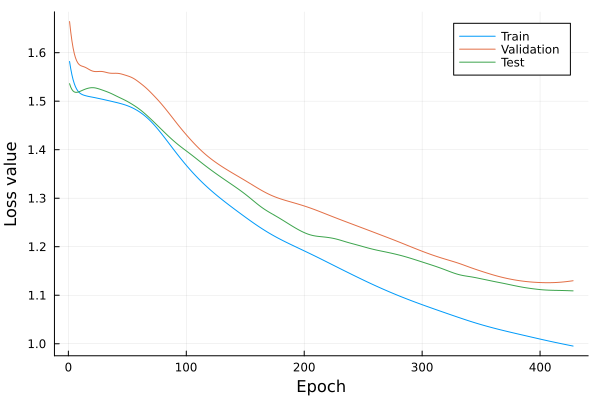

In [24]:
plt = Plots.plot() 
plot!(plt, 1:size(ann1_2[2])[1], ann1_2[2], xaxis = "Epoch", yaxis = "Loss value", label = "Train") 
plot!(plt, 1:size(ann1_2[3])[1], ann1_2[3], label = "Validation")
plot!(plt, 1:size(ann1_2[4])[1], ann1_2[4], label = "Test")

In [25]:
predictionsTest = ann1_2[1](testTuple[1]')'
confMtrxAnn1_2 = confusionMatrix(predictionsTest,testTuple[2])[end]

5×5 Matrix{Int64}:
 9  2   4   1  2
 0  0   0   0  0
 5  3  23   3  3
 1  1   3  10  0
 0  1   3   0  6

The ANN was only unable to predict the LUAD class, and although the missclassified items are plenty, this model did not do nearly as bad as the prior one.

# Approach 2. Naïve multiclass classification using more features

Approach 2 is identical to 1, except this time we will grab the fist 50 features (genes 0 to 49). In this way we will be able to assess to what extent the number of naïvely chosen features used to train the models has an impact on their performances.

In [26]:
naiveInputsNorm = inputsNormZM[:,1:50]

801×50 Matrix{Float32}:
 -0.194678  -0.827513    0.159701  …  -0.162214    1.94557     0.150219
 -0.194678  -2.01376    -1.41416      -1.50168     0.443732   -0.323449
 -0.194678   0.417087    1.15601      -0.842478    1.29714    -0.895036
 -0.194678   0.543549    1.32535       2.25328     1.66603    -0.895036
 -0.194678  -0.29577    -0.256947      0.233025   -0.139474    0.676203
 -0.194678   0.380524    0.456613  …   0.356842    1.32664     0.684304
 -0.194678  -1.48726    -1.31773       0.0658714  -0.729436    2.4211
 -0.194678  -0.129957   -1.26208       1.17532     0.433834    0.964656
 -0.194678   0.817116   -0.302758      1.03372    -1.39646    -0.895036
 -0.194678   0.525958    1.24644       0.630654    0.520843   -0.895036
 -0.194678   0.400692    0.429826  …  -0.717306    0.48794     0.0134041
 -0.194678  -0.0580665  -0.405474      0.496489   -0.0962072   1.3069
 -0.194678   0.798981   -0.686052      0.63665    -0.245093   -0.895036
  ⋮                                ⋱       

In [27]:
testTrainTuple = (naiveInputsNorm,targets)

(Float32[-0.19467768 -0.82751274 … 1.9455738 0.15021893; -0.19467768 -2.013759 … 0.44373167 -0.3234495; … ; -0.19467768 -0.3502342 … 1.2791535 -0.8950361; -0.19467768 -0.5709953 … 1.0368679 -0.8950361], Any["PRAD", "LUAD", "PRAD", "PRAD", "BRCA", "PRAD", "KIRC", "PRAD", "BRCA", "PRAD"  …  "BRCA", "BRCA", "BRCA", "PRAD", "LUAD", "BRCA", "LUAD", "COAD", "PRAD", "PRAD"])

In [28]:
modelType = :ANN

modelHyperparameters1 = Dict("topology" => [size(testTrainTuple[1])[2],10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters2 = Dict("topology" => [size(testTrainTuple[1])[2],50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters3 = Dict("topology" => [size(testTrainTuple[1])[2],100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters4 = Dict("topology" => [size(testTrainTuple[1])[2],300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters5 = Dict("topology" => [size(testTrainTuple[1])[2],10,10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters6 = Dict("topology" => [size(testTrainTuple[1])[2],50,50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters7 = Dict("topology" => [size(testTrainTuple[1])[2],100,100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters8 = Dict("topology" => [size(testTrainTuple[1])[2],300,300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)

cvAnn2_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn2_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn2_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn2_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn2_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn2_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn2_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn2_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.8852559229620793, 0.15057633548542879, 0.8077603149178738, 0.16044831903699172)

In [29]:
modelType = :DecisionTree

modelHyperparameters1 = Dict("maxDepth" => 2,"randomState" => 0)
modelHyperparameters2 = Dict("maxDepth" => 3,"randomState" => 0)
modelHyperparameters3 = Dict("maxDepth" => 4,"randomState" => 0)
modelHyperparameters4 = Dict("maxDepth" => 5,"randomState" => 0)
modelHyperparameters5 = Dict("maxDepth" => 6,"randomState" => 0)
modelHyperparameters6 = Dict("maxDepth" => 10,"randomState" => 0)

cvDt2_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt2_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt2_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt2_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt2_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt2_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.996947710681545, 0.0018273314894656641, 0.8614773298008865, 0.04966088894835363)

In [30]:
modelType = :kNN

modelHyperparameters1 = Dict("nNeighbors" => 2)
modelHyperparameters2 = Dict("nNeighbors" => 3)
modelHyperparameters3 = Dict("nNeighbors" => 4)
modelHyperparameters4 = Dict("nNeighbors" => 5)
modelHyperparameters5 = Dict("nNeighbors" => 6)
modelHyperparameters6 = Dict("nNeighbors" => 7)

cvKnn2_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn2_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn2_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn2_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn2_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn2_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.9378524957262911, 0.004174693008050428, 0.9148208840089052, 0.029445233539026124)

In [31]:
modelType = :SVC

modelHyperparameters1 = Dict("C" => 0.0001)
modelHyperparameters2 = Dict("C" => 0.001)
modelHyperparameters3 = Dict("C" => 0.01)
modelHyperparameters4 = Dict("C" => 0.1)
modelHyperparameters5 = Dict("C" => 1)
modelHyperparameters6 = Dict("C" => 10)
modelHyperparameters7 = Dict("C" => 100)
modelHyperparameters8 = Dict("C" => 1000)

cvSvc2_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc2_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc2_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc2_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc2_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc2_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc2_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc2_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.9378524957262911, 0.004174693008050428, 0.9148208840089052, 0.029445233539026124)

In [32]:
AccAnns2 = [cvAnn2_1[3],cvAnn2_2[3],cvAnn2_3[3],cvAnn2_4[3],cvAnn2_5[3],cvAnn2_6[3],cvAnn2_7[3],cvAnn2_8[3]]
AccDts2 = [cvDt2_1[3],cvDt2_2[3],cvDt2_3[3],cvDt2_4[3],cvDt2_5[3],cvDt2_6[3]]
AccKnns2 = [cvKnn2_1[3],cvKnn2_2[3],cvKnn2_3[3],cvKnn2_4[3],cvKnn2_5[3],cvKnn2_6[3]]
AccSvc2 = [cvSvc2_1[3],cvSvc2_2[3],cvSvc2_3[3],cvSvc2_4[3],cvSvc2_5[3],cvSvc2_6[3],cvSvc2_7[3],cvSvc2_8[3]]

StdAnns2 = [cvAnn2_1[4],cvAnn2_2[4],cvAnn2_3[4],cvAnn2_4[4],cvAnn2_5[4],cvAnn2_6[4],cvAnn2_7[4],cvAnn2_8[4]]
StdDts2 = [cvDt2_1[4],cvDt2_2[4],cvDt2_3[4],cvDt2_4[4],cvDt2_5[4],cvDt2_6[4]]
StdKnns2 = [cvKnn2_1[4],cvKnn2_2[4],cvKnn2_3[4],cvKnn2_4[4],cvKnn2_5[4],cvKnn2_6[4]]
StdSvc2 = [cvSvc2_1[4],cvSvc2_2[4],cvSvc2_3[4],cvSvc2_4[4],cvSvc2_5[4],cvSvc2_6[4],cvSvc2_7[4],cvSvc2_8[4]]

8-element Vector{Float64}:
 0.029445233539026124
 0.029445233539026124
 0.029445233539026124
 0.029445233539026124
 0.029445233539026124
 0.029445233539026124
 0.029445233539026124
 0.029445233539026124

The results are shown bellow, followed by a comparison to performances obtained in approach 1. 

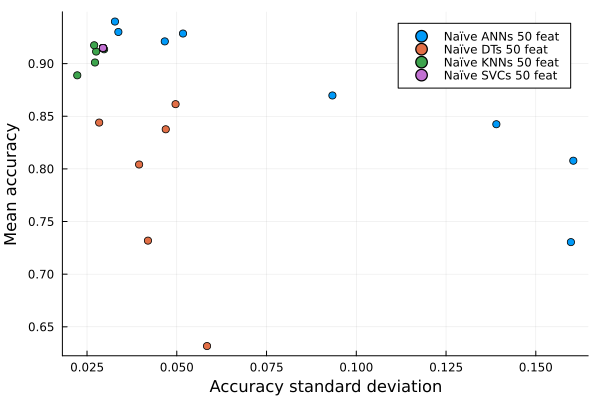

In [33]:
plt = Plots.plot() 
plot!(StdAnns2, AccAnns2, seriestype=:scatter, label="Naïve ANNs 50 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy")
plot!(StdDts2, AccDts2, seriestype=:scatter, label="Naïve DTs 50 feat")
plot!(StdKnns2, AccKnns2, seriestype=:scatter, label="Naïve KNNs 50 feat")
plot!(StdSvc2, AccSvc2, seriestype=:scatter, label="Naïve SVCs 50 feat")

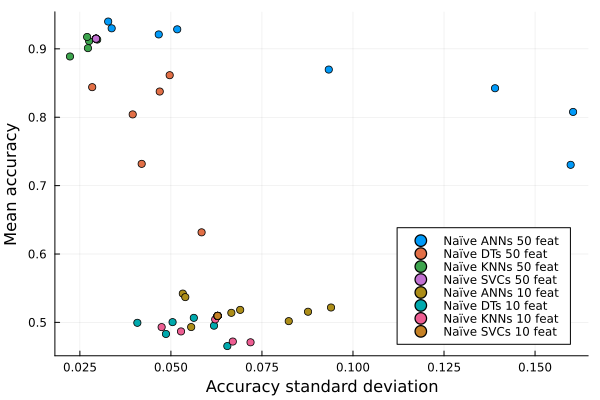

In [34]:
plt = Plots.plot() 
plot!(StdAnns2, AccAnns2, seriestype=:scatter, label="Naïve ANNs 50 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy", legend=:bottomright)
plot!(StdDts2, AccDts2, seriestype=:scatter, label="Naïve DTs 50 feat")
plot!(StdKnns2, AccKnns2, seriestype=:scatter, label="Naïve KNNs 50 feat")
plot!(StdSvc2, AccSvc2, seriestype=:scatter, label="Naïve SVCs 50 feat")
plot!(StdAnns1, AccAnns1, seriestype=:scatter, label="Naïve ANNs 10 feat")
plot!(StdDts1, AccDts1, seriestype=:scatter, label="Naïve DTs 10 feat")
plot!(StdKnns1, AccKnns1, seriestype=:scatter, label="Naïve KNNs 10 feat")
plot!(StdSvc1, AccSvc1, seriestype=:scatter, label="Naïve SVCs 10 feat")

There was definitely an improvement in accuracy. Even the worst performing model of this approach did better than the best of last's approach.   
One interesting thing to notice however is the higher deviation some of the ANNs present. This deviation is however relatively small being barely over 1.5% accuracy.  
We will however investigate further if this discrepancy in standard deviations may cause any problems in practice. We will do this by training the best and worst performing ANNs (deviation-wise) using two distinct data splits, and analyzing their confusion matrices and overall accuracies. 
Before doing this, notice again the value of "C" did not affect classification accuracy for SVCs.

In [35]:
display(argmax(StdAnns2))
display(argmin(StdAnns2))

8

4

ANN2_8 was the best performer, while ANN2_4 was the best.

In [36]:
valTestTrainTuples1 = partition((testTrainTuple[1],oneHotEncoding(testTrainTuple[2])),Ptest=0.1,Pval=0.1)
valTestTrainTuples2 = partition((testTrainTuple[1],oneHotEncoding(testTrainTuple[2])),Ptest=0.1,Pval=0.1)

valTuple1 = valTestTrainTuples1[1]
testTuple1 = valTestTrainTuples1[2]
trainTuple1 = valTestTrainTuples1[3] 

valTuple2 = valTestTrainTuples2[1]
testTuple2 = valTestTrainTuples2[2]
trainTuple2 = valTestTrainTuples2[3] 

topology1 = [size(trainTuple1[1])[2],300,300,size(trainTuple1[2])[2]]
topology2 = [size(trainTuple2[1])[2],300,size(trainTuple2[2])[2]]

ann2_8split1 = trainClassANN(topology1,trainTuple1,maxEpochs=500,learningRate=3e-3,
    validationDataset=valTuple1,testDataset=testTuple1,minLoss=0.1,showText=false)
ann2_8split2 = trainClassANN(topology1,trainTuple2,maxEpochs=500,learningRate=3e-3,
    validationDataset=valTuple2,testDataset=testTuple2,minLoss=0.1,showText=false)

ann2_4split1 = trainClassANN(topology2,trainTuple1,maxEpochs=500,learningRate=3e-3,
    validationDataset=valTuple1,testDataset=testTuple1,minLoss=0.1,showText=false)
ann2_4split2 = trainClassANN(topology2,trainTuple2,maxEpochs=500,learningRate=3e-3,
    validationDataset=valTuple2,testDataset=testTuple2,minLoss=0.1,showText=false)

(Chain(Dense(50 => 50, σ), Dense(50 => 300, σ), Dense(300 => 5, σ), Dense(5 => 5), softmax), Any[1.7125823f0, 1.6043112f0, 1.5521938f0, 1.5303646f0, 1.5215582f0, 1.5179739f0, 1.5164199f0, 1.5156372f0, 1.5151291f0, 1.5146927f0  …  0.19445772f0, 0.19390464f0, 0.19335513f0, 0.19280899f0, 0.19226599f0, 0.191726f0, 0.19118886f0, 0.19065449f0, 0.19012284f0, 0.18959402f0], Any[1.6813358f0, 1.5949382f0, 1.5587236f0, 1.547095f0, 1.5446107f0, 1.5449944f0, 1.5460138f0, 1.5469652f0, 1.5476649f0, 1.5480899f0  …  0.33786488f0, 0.33760637f0, 0.33732763f0, 0.33702528f0, 0.3366971f0, 0.3363423f0, 0.3359613f0, 0.33555594f0, 0.33512884f0, 0.33468372f0], Any[1.6973547f0, 1.600248f0, 1.5555394f0, 1.5378544f0, 1.5313208f0, 1.5290937f0, 1.5284302f0, 1.5282686f0, 1.5282054f0, 1.5280892f0  …  0.30218717f0, 0.30154586f0, 0.3009364f0, 0.30036226f0, 0.299825f0, 0.2993251f0, 0.29886168f0, 0.2984329f0, 0.29803592f0, 0.29766732f0])

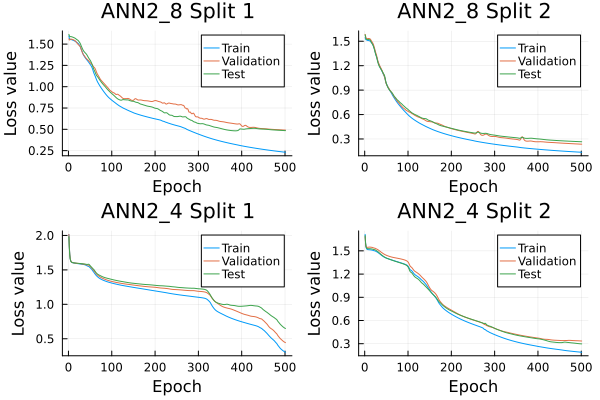

In [37]:
plt1 = Plots.plot() 
plot!(plt1, 1:size(ann2_8split1[2])[1], ann2_8split1[2], xaxis = "Epoch", yaxis = "Loss value", label = "Train", title = "ANN2_8 Split 1") 
plot!(plt1, 1:size(ann2_8split1[3])[1], ann2_8split1[3], label = "Validation")
plot!(plt1, 1:size(ann2_8split1[4])[1], ann2_8split1[4], label = "Test")
plt2 = Plots.plot() 
plot!(plt2, 1:size(ann2_8split2[2])[1], ann2_8split2[2], xaxis = "Epoch", yaxis = "Loss value", label = "Train", title = "ANN2_8 Split 2") 
plot!(plt2, 1:size(ann2_8split2[3])[1], ann2_8split2[3], label = "Validation")
plot!(plt2, 1:size(ann2_8split2[4])[1], ann2_8split2[4], label = "Test")
plt3 = Plots.plot() 
plot!(plt3, 1:size(ann2_4split1[2])[1], ann2_4split1[2], xaxis = "Epoch", yaxis = "Loss value", label = "Train", title = "ANN2_4 Split 1") 
plot!(plt3, 1:size(ann2_4split1[3])[1], ann2_4split1[3], label = "Validation")
plot!(plt3, 1:size(ann2_4split1[4])[1], ann2_4split1[4], label = "Test")
plt4 = Plots.plot() 
plot!(plt4, 1:size(ann2_4split2[2])[1], ann2_4split2[2], xaxis = "Epoch", yaxis = "Loss value", label = "Train", title = "ANN2_4 Split 2") 
plot!(plt4, 1:size(ann2_4split2[3])[1], ann2_4split2[3], label = "Validation")
plot!(plt4, 1:size(ann2_4split2[4])[1], ann2_4split2[4], label = "Test")

plot(plt1, plt2, plt3, plt4)

In [38]:
predictionsTest2_8split1 = ann2_8split1[1](testTuple1[1]')'
confMtrxAnn2_8split1 = confusionMatrix(predictionsTest2_8split1,testTuple1[2])[end]
accuracy2_8split1 = accuracy(predictionsTest2_8split1,testTuple1[2])

predictionsTest2_8split2 = ann2_8split2[1](testTuple2[1]')'
confMtrxAnn2_8split2 = confusionMatrix(predictionsTest2_8split2,testTuple2[2])[end]
accuracy2_8split2 = accuracy(predictionsTest2_8split2,testTuple2[2])

predictionsTest2_4split1 = ann2_4split1[1](testTuple1[1]')'
confMtrxAnn2_4split1 = confusionMatrix(predictionsTest2_4split1,testTuple1[2])[end]
accuracy2_4split1 = accuracy(predictionsTest2_4split1,testTuple1[2])

predictionsTest2_4split2 = ann2_4split2[1](testTuple2[1]')'
confMtrxAnn2_4split2 = confusionMatrix(predictionsTest2_4split2,testTuple2[2])[end]
accuracy2_4split2 = accuracy(predictionsTest2_4split2,testTuple2[2])

display(confMtrxAnn2_8split1)
display(accuracy2_8split1)
display(confMtrxAnn2_8split2)
display(accuracy2_8split2)
display(confMtrxAnn2_4split1)
display(accuracy2_4split1)
display(confMtrxAnn2_4split2)
display(accuracy2_4split2)

5×5 Matrix{Int64}:
 16   0   0   0  0
  0  10   2   1  0
  0   4  25   0  0
  0   0   0  13  0
  0   0   0   1  8

0.9

5×5 Matrix{Int64}:
 14   0   0   0  0
  0  13   0   0  0
  0   1  27   1  0
  0   0   0  17  0
  0   1   1   0  5

0.95

5×5 Matrix{Int64}:
 15   0   0   0  1
  0  10   3   2  0
  1   4  24   0  0
  0   0   0  13  0
  0   0   0   0  7

0.8625

5×5 Matrix{Int64}:
 14   0   0   1  0
  0  13   1   0  0
  0   0  27   0  0
  0   0   0  17  0
  0   2   0   0  5

0.95

For these two data splits in particular, ANN2_8 managed to obtain slightly better results than ANN2_4. These levels of deviation therefore do not seem to pose any real problem.  

And again up to the ensemble model.

In [39]:
estimators = [:SVC,:kNN,:DecisionTree]
modelsHyperParameters =  [Dict{String,Any}("C" => 10), Dict{String,Any}("nNeighbors" => 4), 
                            Dict{String,Any}("maxDepth" => 2,"randomState" => 0)]

ensemble2 = trainClassEnsemble(estimators,modelsHyperParameters,
                            (testTrainTuple[1],oneHotEncoding(testTrainTuple[2])),kFoldIndices)

0.967205652149565

In [40]:
maximum(AccAnns2)

0.9399486669323037

As last time, the ensemble prediction was better than any of the individual models. The improvements in this case were however far most modest, as it only achieved about a 2% improvement over the best performing individual model; an ANN. 

# Approach 3. Informed multiclass classification using few features

For this approach we will try a different kind of preprocessing and feature selection.
First, instead of zero-mean normalizing, we will min-max normalize as we will need the data to be in the "same scale". 

In [41]:
inputsNormMM = normalizeMinMax(inputs)

801×20531 Matrix{Float32}:
 0.0       0.323424   0.538556  0.0916367  …  0.213546  0.442221  0.0
 0.0       0.0950343  0.261965  0.503271      0.309838  0.141369  0.0
 0.0       0.56305    0.713649  0.365706      0.449794  0.102625  0.0
 0.0       0.587397   0.743409  0.322208      0.367733  0.254246  0.0
 0.0       0.425802   0.465334  0.298847      0.322636  0.425599  0.0
 0.0       0.55601    0.590736  0.314625   …  0.398469  0.448664  0.0
 0.0       0.196402   0.278912  0.305205      0.278793  0.729084  0.0
 0.0       0.457726   0.288692  0.433072      0.273267  0.561401  0.0
 0.0       0.640068   0.457283  0.300261      0.510372  0.681723  0.0
 0.0       0.584011   0.729541  0.359402      0.327306  0.392502  0.0
 0.0       0.559893   0.586028  0.418422   …  0.22778   0.484472  0.169927
 0.0       0.471567   0.439232  0.30319       0.290178  0.44126   0.0810375
 0.0       0.636576   0.389923  0.417199      0.388312  0.512195  0.0
 ⋮                                         ⋱        

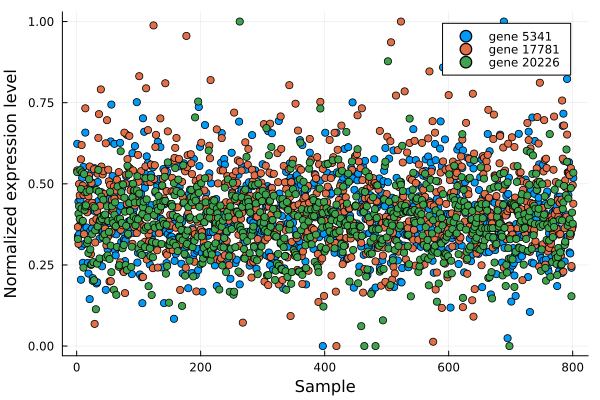

In [42]:
plt = Plots.plot() 
plot!(inputsNormMM[:,5342], seriestype=:scatter, label="gene 5341", xaxis = "Sample", yaxis = "Normalized expression level")
plot!(inputsNormMM[:,17782], seriestype=:scatter, label="gene 17781")
plot!(inputsNormMM[:,20227], seriestype=:scatter, label="gene 20226")

Now that all data is bounded between 0 to 1, we next separate each sample into a different array given its class, and obtain the inter class variation for the expression of each gene.

In [43]:
separatedClassesInputs = ([],[],[],[],[])
for i in 1:size(encodedTargets)[1]
    classNum = findfirst(x -> x == 1, encodedTargets[i,:])
    append!(separatedClassesInputs[classNum],inputsNormMM[i,:]) 
end

prad = reshape(separatedClassesInputs[1],(size(inputs)[2],Int64(size(separatedClassesInputs[1])[1]/size(inputs)[2])))'
prad = convert(Matrix{Float32}, prad)
luad = reshape(separatedClassesInputs[2],(size(inputs)[2],Int64(size(separatedClassesInputs[2])[1]/size(inputs)[2])))'
luad = convert(Matrix{Float32}, luad)
brca = reshape(separatedClassesInputs[3],(size(inputs)[2],Int64(size(separatedClassesInputs[3])[1]/size(inputs)[2])))'
brca = convert(Matrix{Float32}, brca)
kirk = reshape(separatedClassesInputs[4],(size(inputs)[2],Int64(size(separatedClassesInputs[4])[1]/size(inputs)[2])))'
kirk = convert(Matrix{Float32}, kirk)
coad = reshape(separatedClassesInputs[5],(size(inputs)[2],Int64(size(separatedClassesInputs[5])[1]/size(inputs)[2])))'
coad = convert(Matrix{Float32}, coad)

classesMean = vcat(mean(prad,dims=1),mean(luad,dims=1),mean(brca,dims=1),mean(kirk,dims=1),mean(coad,dims=1))

interClassStd = vec(std(classesMean,dims=1))

20531-element Vector{Float32}:
 0.009633189
 0.07424578
 0.09695528
 0.112564154
 0.073739454
 0.0
 0.043777484
 0.033769768
 0.0057311985
 0.0033729256
 0.024802905
 0.024801929
 0.0249302
 ⋮
 0.12873052
 0.14144714
 0.07691961
 0.041787174
 0.029540524
 0.24545304
 0.09160082
 0.06630763
 0.03207068
 0.038740795
 0.09375272
 0.012714678

We obtain the sorted indices for this interclass variation.

In [44]:
sortedInterClassStdIndices = sortperm(interClassStd)

20531-element Vector{Int64}:
     6
    24
  4371
  4809
  4810
  4815
  4817
  4818
  4832
  5289
  7662
  7663
  7664
     ⋮
 16338
  3462
  3525
 13977
  5668
  9177
 18637
  7966
  9176
  3922
   743
 19237

In [45]:
println(interClassStd[sortedInterClassStdIndices[1]])
println(interClassStd[sortedInterClassStdIndices[end]])

0.0
0.4077369


We can see that the first feature on the list ("6", which corresponds to gene 5) has the lowest interclass deviation (0), while the last ("19237", or gene 19236) has the highest (0.4).
We then keep the 10 features with the highest interclass variability for training.

In [46]:
highestInterclassStdsIndices = sortedInterClassStdIndices[end-9:end]

10-element Vector{Int64}:
  3525
 13977
  5668
  9177
 18637
  7966
  9176
  3922
   743
 19237

In [47]:
informedInputsNormMM = inputsNormMM[:,highestInterclassStdsIndices[1]]
for i in highestInterclassStdsIndices[2:end]
    informedInputsNormMM = hcat(informedInputsNormMM,inputsNormMM[:,i])
end
display(informedInputsNormMM)

801×10 Matrix{Float32}:
 0.36526    0.967403  0.0        …  0.0502587  0.0556184  0.0458886
 0.0243617  0.0       0.0           0.0499169  0.13767    0.062889
 0.183568   0.713385  0.0635362     0.0676431  0.122805   0.0617613
 0.0327334  0.775173  0.0346859     0.0        0.0976747  0.0982599
 0.0        0.0       0.0           0.0930375  0.0        0.0
 0.197293   0.84341   0.0        …  0.222575   0.0484333  0.0399604
 0.0        0.0       0.0           0.159449   0.0        0.447215
 0.398766   0.758618  0.0352379     0.0        0.0        0.0994615
 0.0        0.0       0.0           0.106385   0.0331064  0.156256
 0.400905   0.837706  0.0           0.0614966  0.0680547  0.0
 0.0        0.0       0.0        …  0.0758137  0.0        0.0398822
 0.0        0.0       0.0339601     0.842916   0.809054   0.927723
 0.226604   0.741617  0.0380745     0.0709345  0.078499   0.121413
 ⋮                               ⋱                        
 0.117695   0.123938  0.183152      0.713332   0.8

In [48]:
testTrainTuple = (informedInputsNormMM,targets)

(Float32[0.36525953 0.9674032 … 0.055618357 0.045888573; 0.024361655 0.0 … 0.13766989 0.06288898; … ; 0.63130826 0.7271778 … 0.12369512 0.12240234; 0.0 0.8366038 … 0.2784633 0.0960354], Any["PRAD", "LUAD", "PRAD", "PRAD", "BRCA", "PRAD", "KIRC", "PRAD", "BRCA", "PRAD"  …  "BRCA", "BRCA", "BRCA", "PRAD", "LUAD", "BRCA", "LUAD", "COAD", "PRAD", "PRAD"])

In [49]:
modelType = :ANN

modelHyperparameters1 = Dict("topology" => [size(testTrainTuple[1])[2],10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters2 = Dict("topology" => [size(testTrainTuple[1])[2],50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters3 = Dict("topology" => [size(testTrainTuple[1])[2],100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters4 = Dict("topology" => [size(testTrainTuple[1])[2],300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters5 = Dict("topology" => [size(testTrainTuple[1])[2],10,10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters6 = Dict("topology" => [size(testTrainTuple[1])[2],50,50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters7 = Dict("topology" => [size(testTrainTuple[1])[2],100,100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters8 = Dict("topology" => [size(testTrainTuple[1])[2],300,300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)

cvAnn3_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn3_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn3_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn3_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn3_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn3_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn3_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn3_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.8227788500428282, 0.132902114131851, 0.8092860575365464, 0.13845257657524696)

In [50]:
modelType = :DecisionTree

modelHyperparameters1 = Dict("maxDepth" => 2,"randomState" => 0)
modelHyperparameters2 = Dict("maxDepth" => 3,"randomState" => 0)
modelHyperparameters3 = Dict("maxDepth" => 4,"randomState" => 0)
modelHyperparameters4 = Dict("maxDepth" => 5,"randomState" => 0)
modelHyperparameters5 = Dict("maxDepth" => 6,"randomState" => 0)
modelHyperparameters6 = Dict("maxDepth" => 10,"randomState" => 0)

cvDt3_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt3_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt3_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt3_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt3_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt3_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.995001534119196, 0.0038837880740740017, 0.9074064691745045, 0.03027562108741503)

In [51]:
modelType = :kNN

modelHyperparameters1 = Dict("nNeighbors" => 2)
modelHyperparameters2 = Dict("nNeighbors" => 3)
modelHyperparameters3 = Dict("nNeighbors" => 4)
modelHyperparameters4 = Dict("nNeighbors" => 5)
modelHyperparameters5 = Dict("nNeighbors" => 6)
modelHyperparameters6 = Dict("nNeighbors" => 7)

cvKnn3_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn3_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn3_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn3_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn3_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn3_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.9440969370995085, 0.004093269668689852, 0.9311967571152504, 0.024281884478611158)

In [52]:
modelType = :SVC

modelHyperparameters1 = Dict("C" => 0.0001)
modelHyperparameters2 = Dict("C" => 0.001)
modelHyperparameters3 = Dict("C" => 0.01)
modelHyperparameters4 = Dict("C" => 0.1)
modelHyperparameters5 = Dict("C" => 1)
modelHyperparameters6 = Dict("C" => 10)
modelHyperparameters7 = Dict("C" => 100)
modelHyperparameters8 = Dict("C" => 1000)

cvSvc3_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc3_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc3_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc3_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc3_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc3_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc3_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc3_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.9440969370995085, 0.004093269668689852, 0.9311967571152504, 0.024281884478611158)

In [53]:
AccAnns3 = [cvAnn3_1[3],cvAnn3_2[3],cvAnn3_3[3],cvAnn3_4[3],cvAnn3_5[3],cvAnn3_6[3],cvAnn3_7[3],cvAnn3_8[3]]
AccDts3 = [cvDt3_1[3],cvDt3_2[3],cvDt3_3[3],cvDt3_4[3],cvDt3_5[3],cvDt3_6[3]]
AccKnns3 = [cvKnn3_1[3],cvKnn3_2[3],cvKnn3_3[3],cvKnn3_4[3],cvKnn3_5[3],cvKnn3_6[3]]
AccSvc3 = [cvSvc3_1[3],cvSvc3_2[3],cvSvc3_3[3],cvSvc3_4[3],cvSvc3_5[3],cvSvc3_6[3],cvSvc3_7[3],cvSvc3_8[3]]

StdAnns3 = [cvAnn3_1[4],cvAnn3_2[4],cvAnn3_3[4],cvAnn3_4[4],cvAnn3_5[4],cvAnn3_6[4],cvAnn3_7[4],cvAnn3_8[4]]
StdDts3 = [cvDt3_1[4],cvDt3_2[4],cvDt3_3[4],cvDt3_4[4],cvDt3_5[4],cvDt3_6[4]]
StdKnns3 = [cvKnn3_1[4],cvKnn3_2[4],cvKnn3_3[4],cvKnn3_4[4],cvKnn3_5[4],cvKnn3_6[4]]
StdSvc3 = [cvSvc3_1[4],cvSvc3_2[4],cvSvc3_3[4],cvSvc3_4[4],cvSvc3_5[4],cvSvc3_6[4],cvSvc3_7[4],cvSvc3_8[4]]

8-element Vector{Float64}:
 0.024281884478611158
 0.024281884478611158
 0.024281884478611158
 0.024281884478611158
 0.024281884478611158
 0.024281884478611158
 0.024281884478611158
 0.024281884478611158

As it is customary, we will go right to the results.

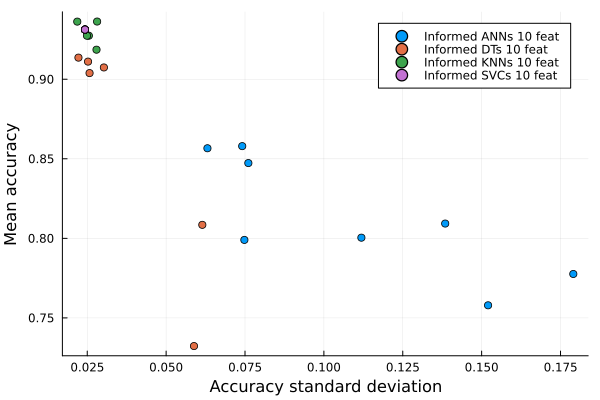

In [54]:
plt = Plots.plot() 
plot!(StdAnns3, AccAnns3, seriestype=:scatter, label="Informed ANNs 10 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy")
plot!(StdDts3, AccDts3, seriestype=:scatter, label="Informed DTs 10 feat")
plot!(StdKnns3, AccKnns3, seriestype=:scatter, label="Informed KNNs 10 feat")
plot!(StdSvc3, AccSvc3, seriestype=:scatter, label="Informed SVCs 10 feat")

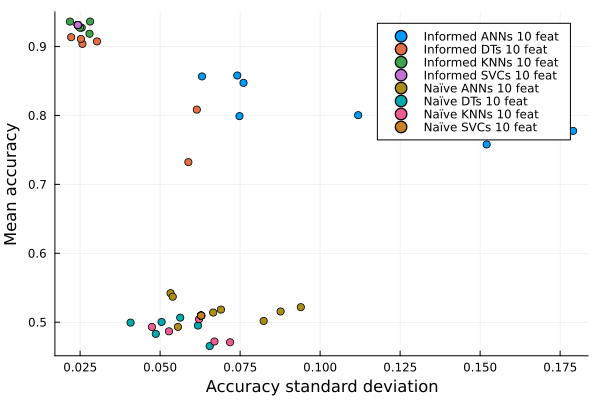

In [55]:
plt = Plots.plot() 
plot!(StdAnns3, AccAnns3, seriestype=:scatter, label="Informed ANNs 10 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy")
plot!(StdDts3, AccDts3, seriestype=:scatter, label="Informed DTs 10 feat")
plot!(StdKnns3, AccKnns3, seriestype=:scatter, label="Informed KNNs 10 feat")
plot!(StdSvc3, AccSvc3, seriestype=:scatter, label="Informed SVCs 10 feat")
plot!(StdAnns1, AccAnns1, seriestype=:scatter, label="Naïve ANNs 10 feat")
plot!(StdDts1, AccDts1, seriestype=:scatter, label="Naïve DTs 10 feat")
plot!(StdKnns1, AccKnns1, seriestype=:scatter, label="Naïve KNNs 10 feat")
plot!(StdSvc1, AccSvc1, seriestype=:scatter, label="Naïve SVCs 10 feat")

It is plain to see the improvements obtained using this informed preprocessing step with respect to the naïve one are outstanding; with every single informed model significantly outperforming even the best of the naïve ones.  

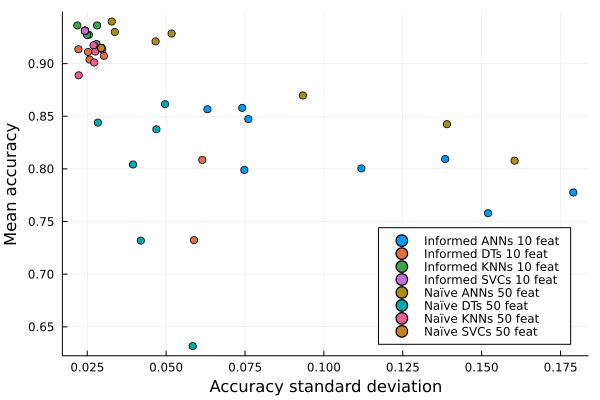

In [56]:
plt = Plots.plot() 
plot!(StdAnns3, AccAnns3, seriestype=:scatter, label="Informed ANNs 10 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy", legend=:bottomright)
plot!(StdDts3, AccDts3, seriestype=:scatter, label="Informed DTs 10 feat")
plot!(StdKnns3, AccKnns3, seriestype=:scatter, label="Informed KNNs 10 feat")
plot!(StdSvc3, AccSvc3, seriestype=:scatter, label="Informed SVCs 10 feat")
plot!(StdAnns2, AccAnns2, seriestype=:scatter, label="Naïve ANNs 50 feat")
plot!(StdDts2, AccDts2, seriestype=:scatter, label="Naïve DTs 50 feat")
plot!(StdKnns2, AccKnns2, seriestype=:scatter, label="Naïve KNNs 50 feat")
plot!(StdSvc2, AccSvc2, seriestype=:scatter, label="Naïve SVCs 50 feat")

With this approach we even managed to obtain performances comparable to those for naïve models trained using five times the number features.

In [57]:
estimators = [:SVC,:kNN,:DecisionTree]
modelsHyperParameters =  [Dict{String,Any}("C" => 10), Dict{String,Any}("nNeighbors" => 4), 
                            Dict{String,Any}("maxDepth" => 2,"randomState" => 0)]

ensemble3 = trainClassEnsemble(estimators,modelsHyperParameters,
                            (testTrainTuple[1],oneHotEncoding(testTrainTuple[2])),kFoldIndices)

0.9991769547325103

The ensemble model in this case reaches an accuracy of practically 100%. At this point the classification problem can be considered solved.

# Approach 4. Informed multiclass classification using more features

For the final approach we will use the same informed preprocessing, but this time selecting the 50 features with the highest interclass deviation.

In [58]:
highestInterclassStdsIndices = sortedInterClassStdIndices[end-49:end]

50-element Vector{Int64}:
 15899
  7561
 12079
 12996
   149
 18136
 12978
  4179
 15896
  8015
  1511
 12849
  6595
     ⋮
 16338
  3462
  3525
 13977
  5668
  9177
 18637
  7966
  9176
  3922
   743
 19237

In [59]:
informedInputsNormMM = inputsNormMM[:,highestInterclassStdsIndices[1]]
for i in highestInterclassStdsIndices[2:end]
    informedInputsNormMM = hcat(informedInputsNormMM,inputsNormMM[:,i])
end
display(informedInputsNormMM)

801×50 Matrix{Float32}:
 0.0654568  0.0828245  0.185995   …  0.0502587  0.0556184  0.0458886
 0.667637   0.0265341  0.0275396     0.0499169  0.13767    0.062889
 0.052696   0.0653065  0.0           0.0676431  0.122805   0.0617613
 0.0213343  0.0356524  0.0653979     0.0        0.0976747  0.0982599
 0.0537503  0.029594   0.0           0.0930375  0.0        0.0
 0.043872   0.0        0.253253   …  0.222575   0.0484333  0.0399604
 0.0        0.0753973  0.621415      0.159449   0.0        0.447215
 0.0        0.159946   0.204711      0.0        0.0        0.0994615
 0.0172834  0.127404   0.0           0.106385   0.0331064  0.156256
 0.0355283  0.0987177  0.0           0.0614966  0.0680547  0.0
 0.0584925  0.214663   0.0        …  0.0758137  0.0        0.0398822
 0.0369953  0.083737   0.803453      0.842916   0.809054   0.927723
 0.0234185  0.111576   0.415986      0.0709345  0.078499   0.121413
 ⋮                                ⋱                        
 0.528174   0.281221   0.85435      

In [60]:
testTrainTuple = (informedInputsNormMM,targets)

(Float32[0.06545684 0.08282449 … 0.055618357 0.045888573; 0.6676369 0.0265341 … 0.13766989 0.06288898; … ; 0.1264303 0.22949639 … 0.12369512 0.12240234; 0.0 0.27041563 … 0.2784633 0.0960354], Any["PRAD", "LUAD", "PRAD", "PRAD", "BRCA", "PRAD", "KIRC", "PRAD", "BRCA", "PRAD"  …  "BRCA", "BRCA", "BRCA", "PRAD", "LUAD", "BRCA", "LUAD", "COAD", "PRAD", "PRAD"])

In [61]:
modelType = :ANN

modelHyperparameters1 = Dict("topology" => [size(testTrainTuple[1])[2],10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters2 = Dict("topology" => [size(testTrainTuple[1])[2],50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters3 = Dict("topology" => [size(testTrainTuple[1])[2],100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters4 = Dict("topology" => [size(testTrainTuple[1])[2],300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters5 = Dict("topology" => [size(testTrainTuple[1])[2],10,10,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters6 = Dict("topology" => [size(testTrainTuple[1])[2],50,50,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters7 = Dict("topology" => [size(testTrainTuple[1])[2],100,100,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)
modelHyperparameters8 = Dict("topology" => [size(testTrainTuple[1])[2],300,300,length(unique(testTrainTuple[2]))],
    "maxEpochs" => 500,"learningRate" => 3e-3, "maxEpochsVal" => 20)

cvAnn4_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn4_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn4_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn4_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn4_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn4_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn4_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvAnn4_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.8659138158094344, 0.10503642223221515, 0.8633592637451853, 0.1179032068101338)

In [62]:
modelType = :DecisionTree

modelHyperparameters1 = Dict("maxDepth" => 2,"randomState" => 0)
modelHyperparameters2 = Dict("maxDepth" => 3,"randomState" => 0)
modelHyperparameters3 = Dict("maxDepth" => 4,"randomState" => 0)
modelHyperparameters4 = Dict("maxDepth" => 5,"randomState" => 0)
modelHyperparameters5 = Dict("maxDepth" => 6,"randomState" => 0)
modelHyperparameters6 = Dict("maxDepth" => 10,"randomState" => 0)

cvDt4_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt4_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt4_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt4_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt4_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvDt4_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(1.0, 1.3846913936850747e-16, 0.9797582848164301, 0.020136648541097465)

In [63]:
modelType = :kNN

modelHyperparameters1 = Dict("nNeighbors" => 2)
modelHyperparameters2 = Dict("nNeighbors" => 3)
modelHyperparameters3 = Dict("nNeighbors" => 4)
modelHyperparameters4 = Dict("nNeighbors" => 5)
modelHyperparameters5 = Dict("nNeighbors" => 6)
modelHyperparameters6 = Dict("nNeighbors" => 7)

cvKnn4_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn4_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn4_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn4_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn4_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvKnn4_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.9947283699670997, 0.0008803493746617083, 0.9937159945547307, 0.006626641310611884)

In [64]:
modelType = :SVC

modelHyperparameters1 = Dict("C" => 0.0001)
modelHyperparameters2 = Dict("C" => 0.001)
modelHyperparameters3 = Dict("C" => 0.01)
modelHyperparameters4 = Dict("C" => 0.1)
modelHyperparameters5 = Dict("C" => 1)
modelHyperparameters6 = Dict("C" => 10)
modelHyperparameters7 = Dict("C" => 100)
modelHyperparameters8 = Dict("C" => 1000)

cvSvc4_1 = modelCrossValidation(modelType,modelHyperparameters1,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc4_2 = modelCrossValidation(modelType,modelHyperparameters2,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc4_3 = modelCrossValidation(modelType,modelHyperparameters3,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc4_4 = modelCrossValidation(modelType,modelHyperparameters4,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc4_5 = modelCrossValidation(modelType,modelHyperparameters5,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc4_6 = modelCrossValidation(modelType,modelHyperparameters6,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc4_7 = modelCrossValidation(modelType,modelHyperparameters7,testTrainTuple[1],testTrainTuple[2],kFoldIndices)
cvSvc4_8 = modelCrossValidation(modelType,modelHyperparameters8,testTrainTuple[1],testTrainTuple[2],kFoldIndices)

(0.9947283699670997, 0.0008803493746617083, 0.9937159945547307, 0.006626641310611884)

In [65]:
AccAnns4 = [cvAnn4_1[3],cvAnn4_2[3],cvAnn4_3[3],cvAnn4_4[3],cvAnn4_5[3],cvAnn4_6[3],cvAnn4_7[3],cvAnn4_8[3]]
AccDts4 = [cvDt4_1[3],cvDt4_2[3],cvDt4_3[3],cvDt4_4[3],cvDt4_5[3],cvDt4_6[3]]
AccKnns4 = [cvKnn4_1[3],cvKnn4_2[3],cvKnn4_3[3],cvKnn4_4[3],cvKnn4_5[3],cvKnn4_6[3]]
AccSvc4 = [cvSvc4_1[3],cvSvc4_2[3],cvSvc4_3[3],cvSvc4_4[3],cvSvc4_5[3],cvSvc4_6[3],cvSvc4_7[3],cvSvc4_8[3]]

StdAnns4 = [cvAnn4_1[4],cvAnn4_2[4],cvAnn4_3[4],cvAnn4_4[4],cvAnn4_5[4],cvAnn4_6[4],cvAnn4_7[4],cvAnn4_8[4]]
StdDts4 = [cvDt4_1[4],cvDt4_2[4],cvDt4_3[4],cvDt4_4[4],cvDt4_5[4],cvDt4_6[4]]
StdKnns4 = [cvKnn4_1[4],cvKnn4_2[4],cvKnn4_3[4],cvKnn4_4[4],cvKnn4_5[4],cvKnn4_6[4]]
StdSvc4 = [cvSvc4_1[4],cvSvc4_2[4],cvSvc4_3[4],cvSvc4_4[4],cvSvc4_5[4],cvSvc4_6[4],cvSvc4_7[4],cvSvc4_8[4]]

8-element Vector{Float64}:
 0.006626641310611884
 0.006626641310611884
 0.006626641310611884
 0.006626641310611884
 0.006626641310611884
 0.006626641310611884
 0.006626641310611884
 0.006626641310611884

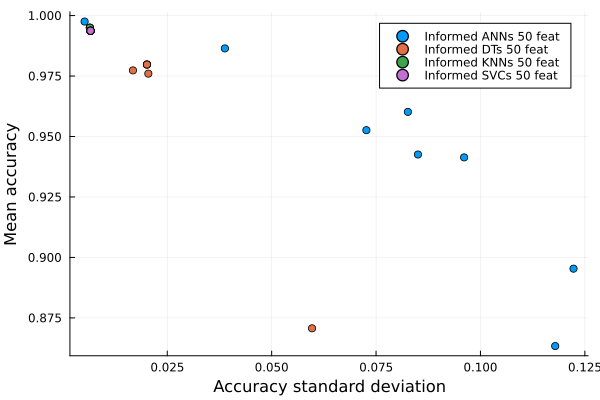

In [66]:
plt = Plots.plot() 
plot!(StdAnns4, AccAnns4, seriestype=:scatter, label="Informed ANNs 50 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy")
plot!(StdDts4, AccDts4, seriestype=:scatter, label="Informed DTs 50 feat")
plot!(StdKnns4, AccKnns4, seriestype=:scatter, label="Informed KNNs 50 feat")
plot!(StdSvc4, AccSvc4, seriestype=:scatter, label="Informed SVCs 50 feat")

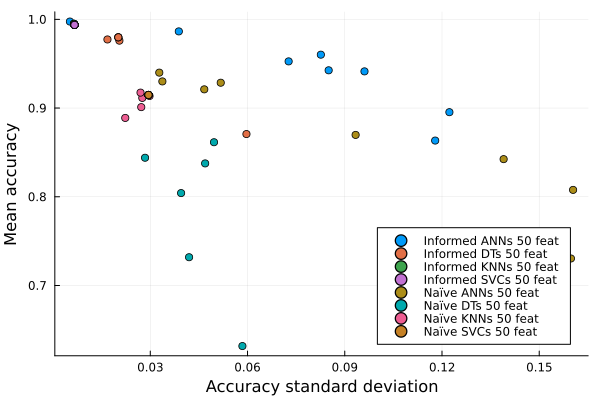

In [67]:
plt = Plots.plot() 
plot!(StdAnns4, AccAnns4, seriestype=:scatter, label="Informed ANNs 50 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy", legend=:bottomright)
plot!(StdDts4, AccDts4, seriestype=:scatter, label="Informed DTs 50 feat")
plot!(StdKnns4, AccKnns4, seriestype=:scatter, label="Informed KNNs 50 feat")
plot!(StdSvc4, AccSvc4, seriestype=:scatter, label="Informed SVCs 50 feat")
plot!(StdAnns2, AccAnns2, seriestype=:scatter, label="Naïve ANNs 50 feat")
plot!(StdDts2, AccDts2, seriestype=:scatter, label="Naïve DTs 50 feat")
plot!(StdKnns2, AccKnns2, seriestype=:scatter, label="Naïve KNNs 50 feat")
plot!(StdSvc2, AccSvc2, seriestype=:scatter, label="Naïve SVCs 50 feat")

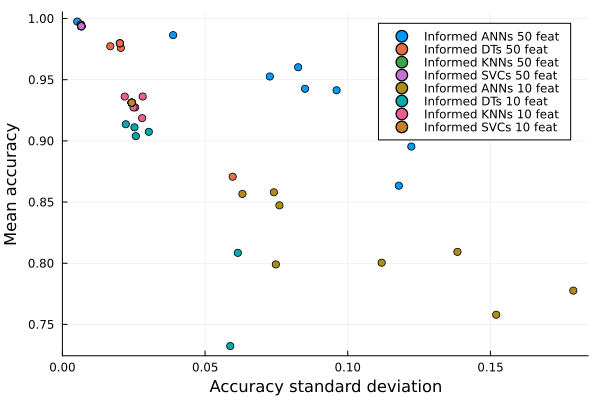

In [68]:
plt = Plots.plot() 
plot!(StdAnns4, AccAnns4, seriestype=:scatter, label="Informed ANNs 50 feat", xaxis = "Accuracy standard deviation", yaxis = "Mean accuracy")
plot!(StdDts4, AccDts4, seriestype=:scatter, label="Informed DTs 50 feat")
plot!(StdKnns4, AccKnns4, seriestype=:scatter, label="Informed KNNs 50 feat")
plot!(StdSvc4, AccSvc4, seriestype=:scatter, label="Informed SVCs 50 feat")
plot!(StdAnns3, AccAnns3, seriestype=:scatter, label="Informed ANNs 10 feat")
plot!(StdDts3, AccDts3, seriestype=:scatter, label="Informed DTs 10 feat")
plot!(StdKnns3, AccKnns3, seriestype=:scatter, label="Informed KNNs 10 feat")
plot!(StdSvc3, AccSvc3, seriestype=:scatter, label="Informed SVCs 10 feat")

These models generally outperform those obtained using other approaches, and some individual models (namely all the kNNs and SVCs approach an accuracy of 100% with very low variability.

In [69]:
estimators = [:SVC,:kNN,:DecisionTree]
modelsHyperParameters =  [Dict{String,Any}("C" => 10), Dict{String,Any}("nNeighbors" => 4), 
                            Dict{String,Any}("maxDepth" => 2,"randomState" => 0)]

ensemble4 = trainClassEnsemble(estimators,modelsHyperParameters,
                            (testTrainTuple[1],oneHotEncoding(testTrainTuple[2])),kFoldIndices)

0.9991769547325103

Having obtained individual weak models capable of effectively solving the classification problem under this approach, the ensemble is overkill. 

# Final discussion

Several important conclusions can be drawn from the obtained results. Most notably, that models are as good the data you feed them. Being smart about data preprocessing can pay off in terms of yielding better performing models; both in terms of speed and predictive capacity. The fact that approach 3 managed to yield very comparable results to approach 2 using only a fifth of the features is evidence of this. Furthermore, it is not always a good idea to use every feature in a dataset, as some of these may aid very little or even not at all in producing accurate predictions, while taking a tall on computational resources.  
Secondly, ANNs are not always the best model to use. On our test, ANNs only outperformed other models in approaches 1 and 2. For approaches 3 and 4, "weaker" models like DTs and kNNs yielded better results. In particular, we noticed that ANNs worked better than other classifiers when training using naïvely selected features; while the opposite was true when using data preprocessed with a more informed approach. This suggest  ANNs are better at finding hidden patterns than other classifiers, but when presented with datapoints pertaining to different classes that are easily sepparable in hyperspace (which tends to be the case for relatively simple situations and better preprocessed data), these simpler models tend to outperform ANNs. Even in the former case, an ensemble of only a few weak classifiers can yield very good results.  
Moreover the performance of the weaker models tended to be less susceptible to test/train splitting bias, as they generally scored better crossvalidation standard deviation results than ANNs. Although in all cases deviations were not big enough to cause any practical hurdle.  
The results obtained regarding the apparent irelevancy of varying the "C" hyperparameter while training SVCs, suggests datapoints living in the hyperpaces product of both preprocessings are easily linearly separable; i.e. datapoints of the same class cluster together, and different class clusters lay relatively far appart as to be effectively separated by a linear function. 